In [2]:
import numpy as np
import roboticstoolbox as rtb
import spatialmath as sm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

<br>

<a id='fk'></a>
### 2.0 Method
---

<br>

<a id='fk'></a>
### 2.1 BO Formulation
---

We use BO to search adaptively for an auscultation location that yields a high quality sound within a specified anatomical region. We denote sound quality estimators for heart and lung sounds as $e_s(r)$, where $s$ is an anatomical structure (heart or lung) and $r$ is a stethoscope recording. The BO approach computes a probabilistic estimate of the unknown field $e_s(r(x))$ across the patient surface using a SPAR-GP model, which is a sum of the observation prior and the GP. An acquisition function is optimized to yield the new auscultation location. Given a new observation, the estimate is re-fit to the data and the process repeats until a termination criterion is met.

$f(x) ∼ GP(m(x), k(x, x ' ))$

For each anatomical location, the observation model is a sum of a parametric prior mean function $μ_θ(x)$ and a GP residual function: 

$f_s(x): e_s(r(x)) ≈ μ_θ(x) + f_s(x)$

Since the GP models residuals with respect to the prior, we subtract the prior from the sound quality as the GP observations: $yi = e_s(r(xi)) − μ_θ(xi)$. Here we further denote the history of the estimated sound qualities as $e = [e_1, . . . , e_n]$. Although the anatomical reference provides sound quality peaks assuming an average human and perfect registration of anatomical landmarks, the robot’s prior should capture the uncertainty in visual registration error and the effect a patient’s body type has on the magnitude of the overall sound quality. Therefore, we make the prior $μ_θ$ a parametric function of the latent variables $θ$ representing the translation offset and sound quality scaling, and infer $θ$ from observed sound qualities. In particular, a reference quality map $μ_0(x)$ is first generated from visual registration and $θ$ is initialized to $θ_0$, which includes zero translation offset and scaling of 1. The exact composition of the prior mean function is deferred.

$θ$ is inferred after each reading using the history $¯x$ and $¯e$ with maximum a posteriori (MAP) estimation.We use a likelihood function $L(θ|¯x, ¯e) = g(e_i|μ_θ(x_i), σ_2)$, where $g(·|μ_θ(x_i), σ_2)$ is the probability density function of the Gaussian distribution $N(μ_θ(x_i), σ2)$. The prior of $θ$, $h(θ)$, follows a multivariate Gaussian distribution $N(θ_o, Σ)$. We solve the MAP estimation problem by maximizing the posterior, using a standard numerical optimization solver:

$θ^∗ =$ argmax  $L(θ|¯x, ¯e)h(θ)$

<br>

<a id='fk'></a>
### 2.2 Sound Quality Estimator
---

<div style="max-width:600px">
    
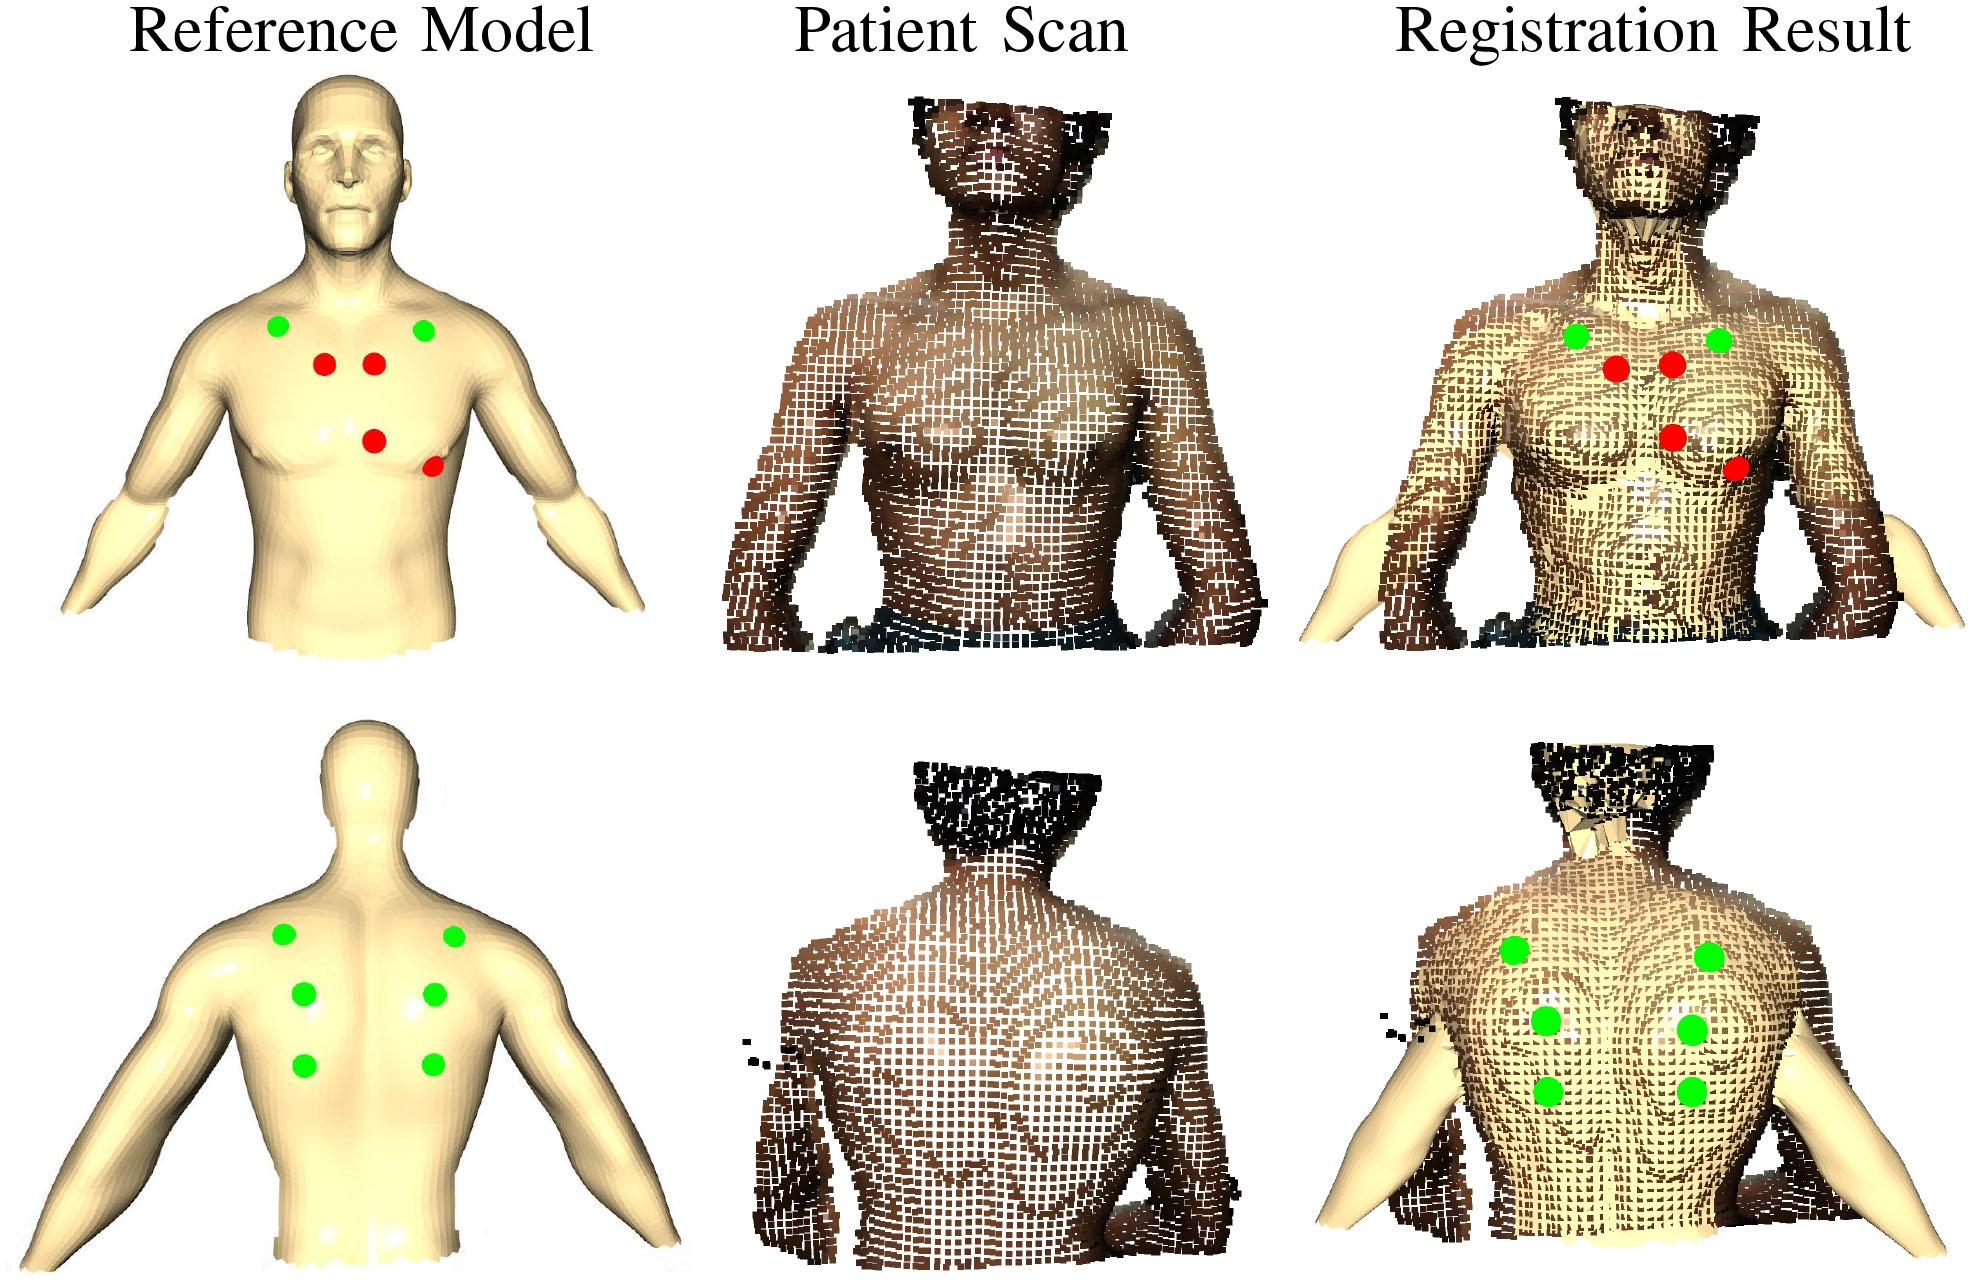
    
</div>

Fig. 4. Left to right: labeled reference models, subject (“patient”) scan point clouds, and result of nonrigid registration. Auscultation locations for heart are labeled in red, and lungs in green.

<br>

<a id='fk'></a>
### 2.3 Visual Registration and Sound Quality Prior
---

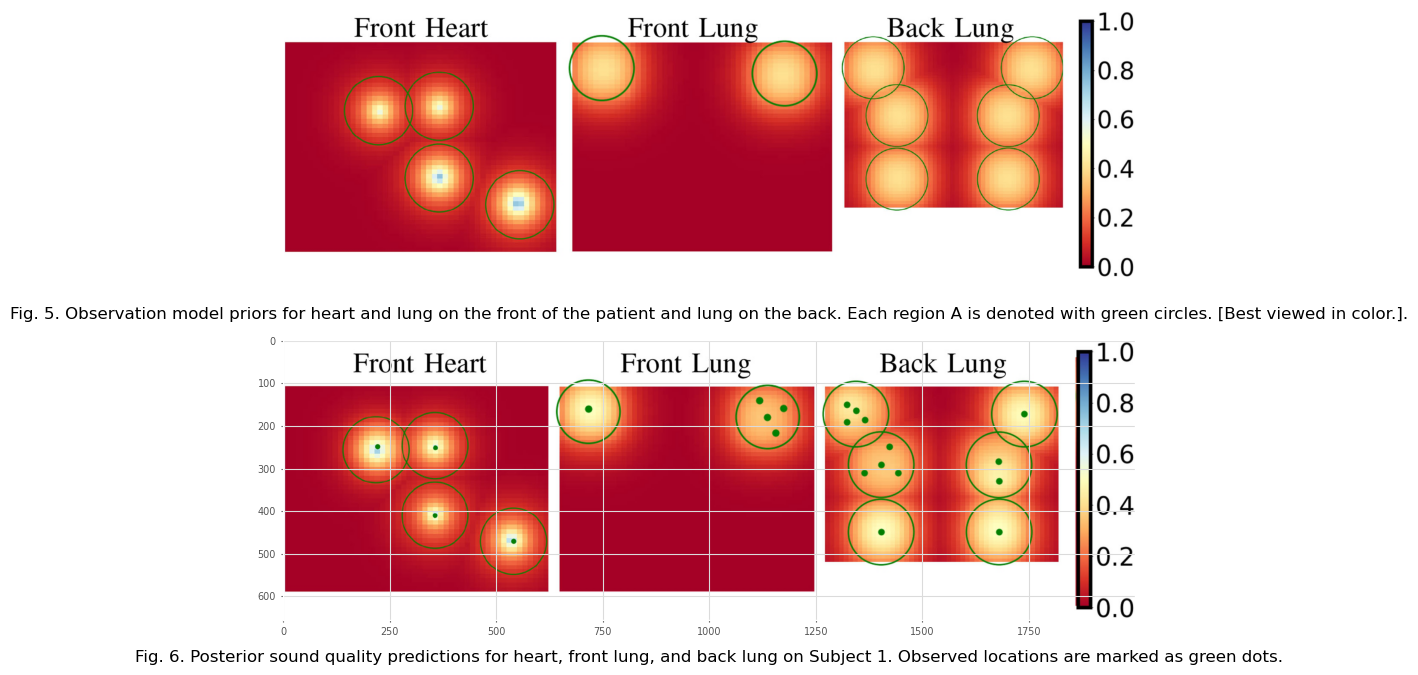

In [5]:
rcParams['figure.figsize'] = 11, 8

img_A = mpimg.imread('img/4.jpg')
img_B = mpimg.imread('img/5.jpg')

fig, ax = plt.subplots(2, 1, figsize=(11, 8))

ax[0].imshow(img_A)
ax[1].imshow(img_B)

caption_A = 'Fig. 5. Observation model priors for heart and lung on the front of the patient and lung on the back. Each region A is denoted with green circles. [Best viewed in color.].'
caption_B = 'Fig. 6. Posterior sound quality predictions for heart, front lung, and back lung on Subject 1. Observed locations are marked as green dots.'

ax[0].text(0.5, -0.15, caption_A, size=12, ha='center', transform=ax[0].transAxes)
ax[1].text(0.5, -0.15, caption_B, size=12, ha='center', transform=ax[1].transAxes)

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].label_outer()

plt.show()

<br>

<a id='fk'></a>
### 2.4 Motion Control
---